In [43]:
# Bibliotecas Importadas
import tcc
import funcoes as demo
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import os
from osgeo import gdal

In [44]:
pontos_cotados = gpd.read_file('C:/Users/User/Desktop/TCC/shapefile/pontos_cotados.shp')
pontos_cotados.head()

,FID_,Entity,Layer,Color,Linetype,Elevation,LineWt,RefName,Angle,geometry
0,0,Insert,PONTE,5,CONTINUOUS,1270.030029,25,COD109,257.0,POINT Z (329281.290 7588018.096 1270.030)
1,0,Insert,PONTE,5,CONTINUOUS,1264.239990,25,COD109,81.0,POINT Z (329307.610 7588018.496 1264.240)
2,0,Insert,PONTE,5,CONTINUOUS,1265.630005,25,COD109,237.0,POINT Z (329335.230 7588102.056 1265.630)
3,0,Insert,PONTE,5,CONTINUOUS,1265.630005,25,COD109,67.0,POINT Z (329355.420 7588091.596 1265.630)
4,0,Insert,PONTE,5,CONTINUOUS,1270.229980,25,COD109,190.0,POINT Z (329382.140 7588176.946 1270.230)


In [45]:
pontos_cotados = gpd.read_file('C:/Users/User/Desktop/TCC/pontoscotados/GEOFT_PONTO_COTADO/GEOFT_PONTO_COTADO.shp')


In [46]:

# # Explodir MultiPoint em Point
# pontos_cotados = pontos_cotados.explode(index_parts=False)

# # Resetar o índice (opcional, mas pode ser útil)
# pontos_cotados.reset_index(drop=True, inplace=True)

# gdf_exploded.head()


,PCO_CD,PCO_NU_COT,PCO_GM_PON,geometry
0,1.0,31.0,None,POINT (-53.80174 -34.38911)
1,2.0,163.0,None,POINT (-53.86358 -33.96844)
2,3.0,64.0,None,POINT (-53.68251 -33.91421)
3,4.0,103.0,None,POINT (-53.80276 -33.90851)
4,5.0,96.0,None,POINT (-53.95292 -33.88748)


In [47]:
demo.distancia_eliptica(-53.80174,-34.38911,-53.86358,-53.86358,0.0005, 0.1)

230.6994594230517

In [48]:
coordenadas_x = pontos_cotados['geometry'].x
coordenadas_x = list(coordenadas_x)
coordenadas_y = pontos_cotados['geometry'].y
coordenadas_y = list(coordenadas_y)
valores_cotados = pontos_cotados['geometry'].z
valores_cotados = list(valores_cotados)
print(pontos_cotados.total_bounds)

# Atribuindo variáveis dentro da lista de dados do total bounds aos valores mínimos e máximos

minx, miny, maxx, maxy = pontos_cotados.total_bounds
print(f"mínima coordenada de x: {minx}\nmáxima coordenada de x: {maxx}\nmínima coordenada de y: {miny}\nmáxima coordenada de y: {maxy}")

[-77.96321878 -34.38911231 -29.30301542   7.967785  ]
mínima coordenada de x: -77.96321877599996
máxima coordenada de x: -29.303015423999966
mínima coordenada de y: -34.38911231399993
máxima coordenada de y: 7.96778499800007


In [49]:
## Criando um Array para os valores de cada eixo utilizando arange da numpy ##

# Criando grid_de_x

grid_de_x = np.arange(minx - 10,maxx + 10, 10, dtype='float64')

# Criando grid_de_y

grid_de_y = np.arange(miny - 10, maxy + 10, 10, dtype='float64')

# Criando Grid de coordenadas com meshgrid da numpy

xi, yi = np.meshgrid(grid_de_x, grid_de_y)

In [50]:
type(xi.shape[0])

int

In [51]:
# Shape do grid de coordenadas, posteriormente para plotar devo reformatar os vetores para este shape
xi.shape

(850, 976)

In [52]:
# Acessando valores no Grid de coordenadas e criando uma lista de tuplas com as respectivas coordenadas

lista_de_tuplas = []
for x, y in np.nditer([xi,yi]):  # Iterando o Grid x e y
    lista_de_tuplas.append((x,y)) # Adicionando cada elemento x e y em uma tupla, correspondendo às coordenadas do grid
    Latitude = []

# Acessando valores dentro da lista de tuplas e atribuindo às listas com os respectivos valores de latitude e longitude

Latitude = []
Longitude = []
for i in lista_de_tuplas:
    Latitude.append(float(i[0])) # Buscando elementos na posição zero (Latitude) da lista de tuplas e adicionando em uma nova lista de floats
    Longitude.append(float(i[1])) # Buscando elementos na posição um (Longitude) da lista de tuplas e adicionando em uma nova lista de floats

In [53]:
Latitude

[-78.01321877599996,
 -77.96321877599996,
 -77.91321877599997,
 -77.86321877599997,
 -77.81321877599997,
 -77.76321877599997,
 -77.71321877599998,
 -77.66321877599998,
 -77.61321877599998,
 -77.56321877599999,
 -77.51321877599999,
 -77.46321877599999,
 -77.413218776,
 -77.363218776,
 -77.313218776,
 -77.263218776,
 -77.213218776,
 -77.16321877600001,
 -77.11321877600001,
 -77.06321877600001,
 -77.01321877600002,
 -76.96321877600002,
 -76.91321877600002,
 -76.86321877600002,
 -76.81321877600003,
 -76.76321877600003,
 -76.71321877600003,
 -76.66321877600004,
 -76.61321877600004,
 -76.56321877600004,
 -76.51321877600004,
 -76.46321877600005,
 -76.41321877600005,
 -76.36321877600005,
 -76.31321877600006,
 -76.26321877600006,
 -76.21321877600006,
 -76.16321877600006,
 -76.11321877600007,
 -76.06321877600007,
 -76.01321877600007,
 -75.96321877600008,
 -75.91321877600008,
 -75.86321877600008,
 -75.81321877600008,
 -75.76321877600009,
 -75.71321877600009,
 -75.6632187760001,
 -75.6132187760001

In [54]:
saida = list(zip(Latitude,Longitude))
entrada = list(zip(coordenadas_x, coordenadas_y, valores_cotados))


In [55]:

entrada[0]
print(saida[0], entrada[0])



(-78.01321877599996, -34.43911231399993) (-53.80174251699998, -34.38911231399993, 31.0)


In [56]:
#### VIZINHOS MAIS PRÓXIMOS ####

#def distancia_euclidiana(x1, y1, x2, y2):
    #return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

valores_zn = []
# Interpolando valores e atribuindo os valores Z dos pontos mais próximos à lista valores_z
for ponto1 in saida:
    x1, y1 = ponto1
    menor_distancia = float('inf')
    z_mais_proximo = None
    for ponto2 in entrada:
        x2, y2, z = ponto2
        distancia = demo.distancia_euclidiana(x1, y1, x2, y2)
        if distancia < menor_distancia:
            menor_distancia = distancia
            z_mais_proximo = z
    valores_zn.append(z_mais_proximo)
type(valores_zn)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_19528\276238455.py", line -1, in <module>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\I

In [ ]:
#### AVERAGE ####
# Raios da elipse
a, b = 1500, 500  # a = raio no eixo x, b = raio no eixo y

medias_z = []
for ponto1 in saida:
    x1, y1 = ponto1
    valores_z = []
    for ponto2 in entrada:
        x2, y2, z = ponto2
        d = demo.distancia_eliptica(x1, y1, x2, y2, 1500, 500)
        if d <= 1:  # Verifica se está dentro da elipse
            valores_z.append(z)  # Adiciona o valor z à lista
    
    # Calcula a média dos valores z para o ponto atual, se tiver algum valor
    media_z = np.mean(valores_z) if valores_z else 0
    medias_z.append(media_z)

type(medias_z)

list

In [ ]:
testando = [(10265695.26133309, 1304.368042), (10266023.484977132, 1295.7769779999999), (10265891.002202751, 1278.010986), (10266894.243067503, 1502.249023), (10265643.859145645, 1284.599976), (10266166.717089772, 1291.0), (10265972.986142917, 1281.099976)]
numerador = ((1.28* (10**-4)) + (1.2621*(10**-4)) + (1.2449* (10**-4)) + (1.463197*(10**-4)) + (1.25138*(10**-4)) + (1.25752*(10**-4)) + (1.247908*(10**-4)))
denominador = ((9.74181*(10**-8)) + (9.740869*(10**-8)) + (9.7409995*(10**-8)) + (9.740043*(10**-8)) + (9.741230*(10**-8)) + (9.740734086*(10**-8)) + (9.740918834*(10**-8)))
tupla = testando[0]
tupla[0]
cimas = []
baixos = []
for i in testando:
    #idw = falatu[1]/falatu[0]
    cima = (i[1]/i[0])
    cimas.append(cima)
    baixo = (1/i[0])
    baixos.append(baixo)
    #interpolacione = (np.sum((i[1]/i[0])) / np.sum((1/i[0])))
result = np.sum(cimas) / np.sum(baixos)
print(result)
numerador/denominador

1319.5839116496481


1320.9346728164883

In [ ]:
listateste = [1259.7822886397532, 927.6884430695842, 1222.5499317084857, 462.7683382303206, 1367.9851206084236, 700.8947950855314, 878.3998490642872]
np.sum(listateste)

6820.068766406386

In [ ]:
def idwinterpolation(altitude: list, distancia: list):
    """ Interpola a altitude de um ponto utilizando o método de interpolação IDW """
    altitude = np.array(altitude)
    distancia = np.array(distancia)
    return np.sum(altitude / distancia**4) / np.sum(1 / distancia**4)


In [ ]:
#### IDW ####

# Raios da elipse
a, b = 1500, 500  # a = raio no eixo x, b = raio no eixo y
pow = 1
idw = []

for ponto1 in saida:
    valoresz = []
    dists = []
    x1, y1 = ponto1
    for ponto2 in entrada:
        x2, y2, z = ponto2
        D = demo.distancia_eliptica(x1, y1, x2, y2, 1500, 500)
        if D <= 1:  # Verifica se está dentro da elipse
            distancia_entre_os_pontos = demo.distancia_euclidiana(x1, y1, x2, y2)
            valoresz.append(z)
            dists.append(distancia_entre_os_pontos)
    calculo = idwinterpolation(valoresz, dists)
    idw.append(calculo)

    
        # Calcula a média dos valores z para o ponto atual, se houver algum
        #interp = np.mean(valores_z) if valores_z else 0
        #idw.append(media_z)


In [ ]:
valores = np.array(valores_zn)
valores = valores.reshape(217,306)
# Plotagem utilizando matplotlib

fig,ax = plt.subplots(figsize = (8,10))

cax = ax.imshow(valores, extent=(minx-5, maxx+5, miny-5, maxy+5), origin="lower", cmap="YlOrRd")

pontos_cotados.plot(color="blue", ax=ax, marker="+", label="Amostras")

cbar=plt.colorbar(cax, fraction = 0.08)
#elipse.plot(color="blue", ax=ax,)
ax.legend()
plt.title("Interpolação vizinho mais próximo")

plt.show()



ValueError: cannot reshape array of size 49 into shape (217,306)

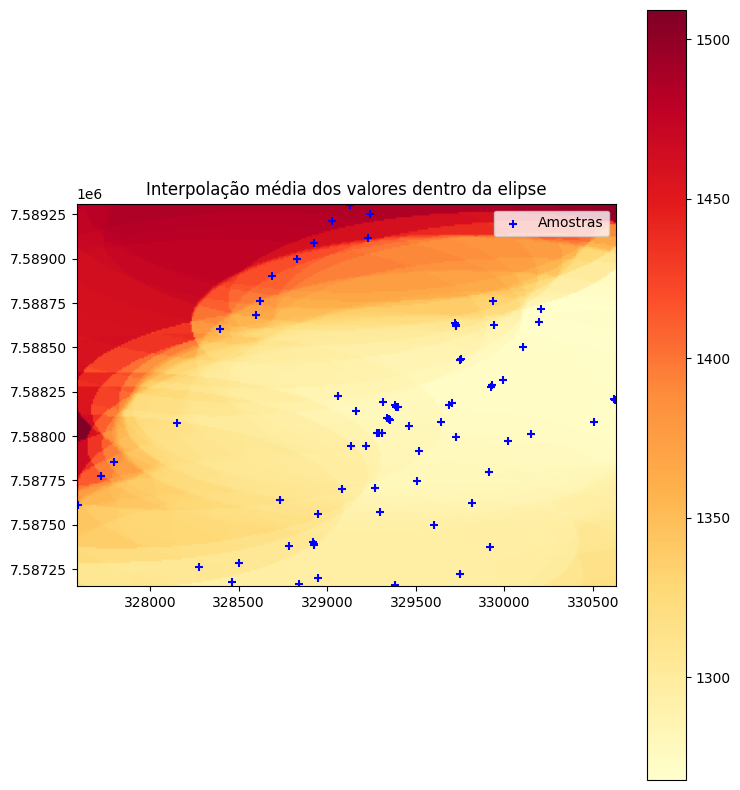

In [ ]:
medias_z = np.array(medias_z)
grid_mediaz_z = medias_z.reshape(217,306)

# Plotagem utilizando matplotlib

fig,ax = plt.subplots(figsize = (8,10))

cax = ax.imshow(grid_mediaz_z, extent=(minx-5, maxx+5, miny-5, maxy+5), origin="lower", cmap="YlOrRd")

pontos_cotados.plot(color="blue", ax=ax, marker="+", label="Amostras")

cbar=plt.colorbar(cax, fraction = 0.08)
#elipse.plot(color="blue", ax=ax,)
ax.legend()
plt.title("Interpolação média dos valores dentro da elipse")

plt.show()

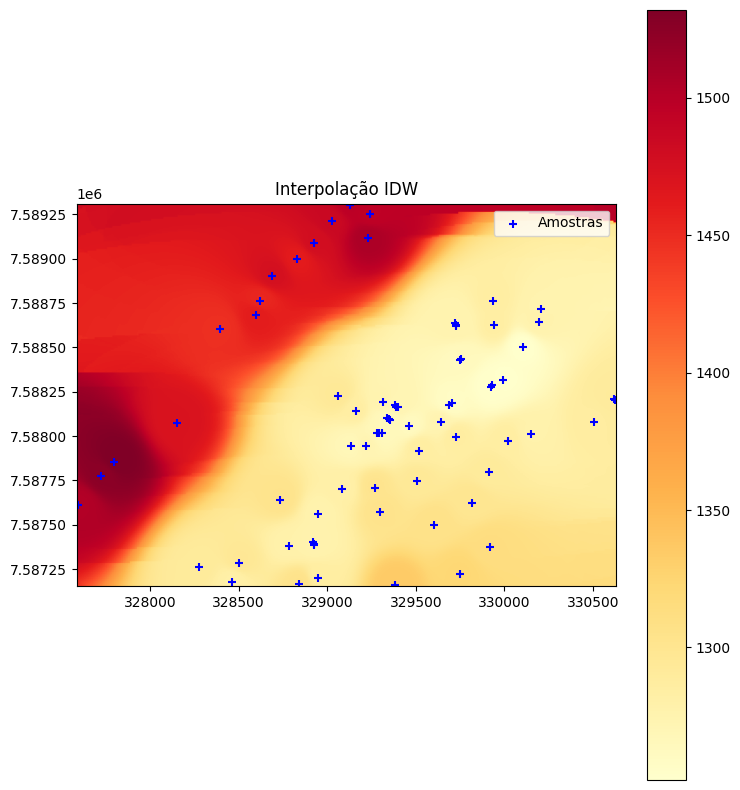

In [ ]:
idw = np.array(idw)
grid_idw = idw.reshape(217,306)

# Plotagem utilizando matplotlib

fig,ax = plt.subplots(figsize = (8,10))

cax = ax.imshow(grid_idw, extent=(minx-5, maxx+5, miny-5, maxy+5), origin="lower", cmap="YlOrRd")

pontos_cotados.plot(color="blue", ax=ax, marker="+", label="Amostras")

cbar=plt.colorbar(cax, fraction = 0.08)
#elipse.plot(color="blue", ax=ax,)
ax.legend()
plt.title("Interpolação IDW")

plt.show()